Does Geography Explain Seasonal Sunshine in U.S. Cities, or Is It Random?

In [43]:
# Import all the packages necessary 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
# Read the csv file
df = pd.read_csv('sunshine.csv')

In [34]:
# View the first few rows of the dataframe
df.head()

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


In [35]:
# Get a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      72 non-null     object 
 1   lon       72 non-null     float64
 2   lat       72 non-null     float64
 3   month     72 non-null     object 
 4   monthnum  72 non-null     int64  
 5   sunshine  72 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.5+ KB


In [44]:
# Check for Missing/Na values
na_values = df.isna().sum()
print(na_values)

city        0
lon         0
lat         0
month       0
monthnum    0
sunshine    0
dtype: int64


Line plot (month vs. sunshine), one line per city.

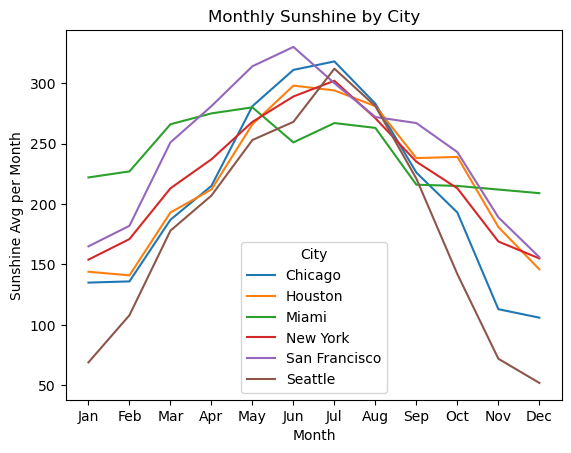

In [42]:
sns.lineplot(data=df, x='month', y='sunshine', hue='city')
plt.title('Monthly Sunshine by City')
plt.ylabel('Sunshine Avg per Month')
plt.xlabel('Month')
plt.legend(title='City')
plt.show()

From the graph, we can tell that some cities like 'Seatle' 'New york' swing noticeable. However, other stay consistent durng the year like 'Miami'. Now in order to understand this we have to summarize/graph the data and try to interepret whether there's a relationship or not.   

In [61]:
# Compute Annual Total Sunshine and view the results
df['annual_sunshine'] = df.groupby('city')['sunshine'].sum()
print(annual_sunshine)

city
Chicago          2504
Houston          2633
Miami            2903
New York         2677
San Francisco    2950
Seattle          2163
Name: sunshine, dtype: int64


We can tell from the results that top 3 'sunniest' cities are San Francisco, Miami and New york

In [62]:
# Define summer and winter months
summer_months = ['Jun', 'Jul', 'Aug']
winter_months = ['Dec', 'Jan', 'Feb']

# Summer average sunshine per city
summer_avg = df[df['month'].isin(summer_months)].groupby('city')['sunshine'].mean()

# Winter average sunshine per city
winter_avg = df[df['month'].isin(winter_months)].groupby('city')['sunshine'].mean()

# Seasonal contrast = Summer - Winter
seasonal_contrast = (summer_avg - winter_avg).sort_values(ascending=False)

print(seasonal_contrast)

city
Seattle          210.666667
Chicago          178.333333
Houston          147.333333
San Francisco    133.000000
New York         127.333333
Miami             41.000000
Name: sunshine, dtype: float64


Cities with the biggest Seasonal swings are Seattle Chicago and Houston

Scatterplot, Latitude vs. Annual Total Sunshine

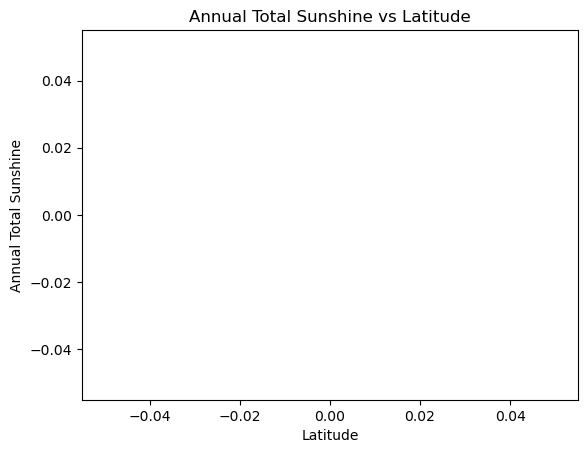

In [64]:
# Plot Annual Total Sunshine vs Latitude
sns.scatterplot(data=df.drop_duplicates('city'), x='lat', y='annual_sunshine')
plt.title('Annual Total Sunshine vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Annual Total Sunshine')
plt.show()

🗺️ Part 3: Geography Connection

Now relate those summary metrics to lat and lon.

Scatterplot 1: Latitude vs. Annual Total Sunshine.

Expectation: Higher lat → less annual sunshine.

Scatterplot 2: Latitude vs. Seasonal Contrast.

Expectation: Higher lat → bigger swings between winter/summer.

(Optional) Add longitude: use color or shape to distinguish west vs. east.

📖 Part 4: Interpretation / Story

Not random: The geography explains patterns.

Latitude effect: Northern cities (e.g., Chicago, New York) have shorter summers and long winters with less sunshine.

Longitude effect: West coast cities (e.g., LA, San Francisco) are more stable compared to east coast cities at similar latitudes.

Trade-off: By aggregating to annual/seasonal metrics, you lose the month-by-month detail but gain geographic explanation.

📝 Part 5: Write-Up Structure

Intro → What question you’re asking (does geography explain sunshine or is it random?).

Visualization 1 → Monthly sunshine by city; show patterns exist.

Visualization 2 → Scatterplots connecting sunshine to latitude (and longitude); show geography explains patterns.

Conclusion → Clear story: geography drives the sunshine differences, not randomness.